In [114]:
# Import the Required Python Libraries:

import pandas as pd  # For data munging, manipulations and preparation        
import numpy as np  # for numerical and mathematical calculations
import seaborn as sns # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting variety of graphs(histograms, heatplots, lineplots
%matplotlib inline
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

### The Dataset

This dataset is about past loans. The Loan payments data.csv data set includes details of 500 customers whose loan are already paid off or defaulted. It includes the following fields:

#### Field Description

Loan_status:  Whether a loan is paid off on in collection

Principal:   Basic principal loan amount at the

Terms:   Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date:   When the loan got originated and took effects

Due_date:    Since it’s one-time payoff schedule, each loan has one single due date

Age:   Age of applicant

Education:    Education of the loan applicant

Gender:   The gender of applicant


In [115]:
# Importing the DataSet and take a look at Data

df= pd.read_csv("Loan payments data.csv")
df.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


# Data Understanding 

In [116]:
# Check the instances(rows) and attributes(columns) in the dataset: Size and Dimension of the dataframe

df.shape
print("DataFrame Dimenisons:", df.shape)

DataFrame Dimenisons: (500, 11)


In [117]:
# Checking the Column types and Count value

ctype = df.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


Text(0.5,1,'General Statistics of the Loans Repayment Dataset')

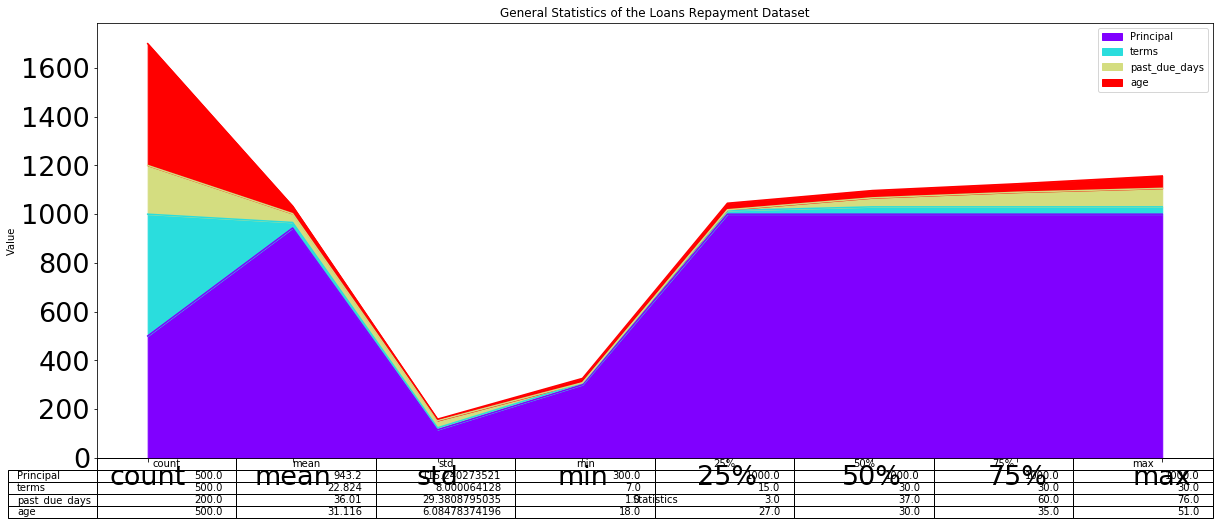

In [118]:
#   Visualziing the Statistical Distribution of the Variables

df.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of the Loans Repayment Dataset")

In [119]:
# Gives information on columns types and number of null values and their percentages

tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
column type,object,object,int64,int64,object,object,object,float64,int64,object,object
null values (nb),0,0,0,0,0,0,100,300,0,0,0
null values (%),0,0,0,0,0,0,20,60,0,0,0


In [120]:
# Function to find the percentage of Null Values present in a data set.

def Train_missing_values(df):
    Missing_Data_Percent=pd.DataFrame(df.isna().sum())
    Missing_Data_Percent.reset_index(inplace=True)
    Missing_Data_Percent.columns=['Feild_Name','Missing_value_count']
    Missing_Data_Percent['Percent_missing_values']=Missing_Data_Percent['Missing_value_count'].\
                                                apply(lambda Missing_value_count:(Missing_value_count/len(df))*100)
    return Missing_Data_Percent.sort_values(['Percent_missing_values'],ascending=False)


Train_missing_values(df)

,Feild_Name,Missing_value_count,Percent_missing_values
7,past_due_days,300,60.0
6,paid_off_time,100,20.0
0,Loan_ID,0,0.0
1,loan_status,0,0.0
2,Principal,0,0.0
3,terms,0,0.0
4,effective_date,0,0.0
5,due_date,0,0.0
8,age,0,0.0
9,education,0,0.0


# Data Preprocessing

### Convert the date columns to date time object

In [121]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,NaN,28,college,female


In [122]:
# Let’s see how many of each class do we have in our dataset

df['loan_status'].value_counts()

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: loan_status, dtype: int64

300 people have paid off the loan on time while 100 have gone into collection

##  Pre-processing: Feature Selection/ Extraction

### Lets look at the day of the week people get the loan

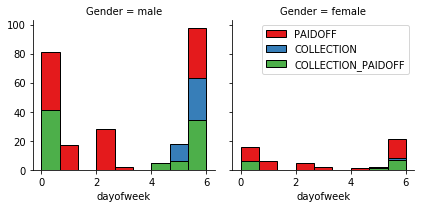

In [123]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4

In [124]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,dayofweek,weekend
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,NaN,45,High School or Below,male,3,0
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,NaN,50,Bechalor,female,3,0
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,NaN,33,Bechalor,female,3,0
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,NaN,27,college,male,3,0
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,NaN,28,college,female,4,1


#### Convert Categorical features to Numerical Values

Lets look at gender:

In [125]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status       
female  PAIDOFF               0.688312
        COLLECTION_PAIDOFF    0.181818
        COLLECTION            0.129870
male    PAIDOFF               0.583924
        COLLECTION            0.212766
        COLLECTION_PAIDOFF    0.203310
Name: loan_status, dtype: float64

68 % of the female paid their loans while only 58 % of Males paid their loans

## Create Dummy Variables for the Categorical Columns

#### Lets convert Male to 0 and Female to 1:

In [126]:

df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,dayofweek,weekend
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,NaN,45,High School or Below,0,3,0
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,NaN,50,Bechalor,1,3,0
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,NaN,33,Bechalor,1,3,0
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,NaN,27,college,0,3,0
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,NaN,28,college,1,4,1


### One Hot Encoding

#### How about the education Column?

In [127]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status       
Bechalor              PAIDOFF               0.611940
                      COLLECTION_PAIDOFF    0.223881
                      COLLECTION            0.164179
High School or Below  PAIDOFF               0.588517
                      COLLECTION            0.234450
                      COLLECTION_PAIDOFF    0.177033
Master or Above       PAIDOFF               0.750000
                      COLLECTION            0.250000
college               PAIDOFF               0.604545
                      COLLECTION_PAIDOFF    0.218182
                      COLLECTION            0.177273
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [128]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,50,1,Bechalor
2,1000,30,33,1,Bechalor
3,1000,15,27,0,college
4,1000,30,28,1,college


#### Use one hot encoding technique to convert the categorical variables to binary variables and append them to the feature Data Frame

In [129]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,50,1,0,1,0,0
2,1000,30,33,1,0,1,0,0
3,1000,15,27,0,0,0,0,1
4,1000,30,28,1,1,0,0,1


## Feature Selection

#### Lets define the feature sets, X:

In [28]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,50,1,0,1,0,0
2,1000,30,33,1,0,1,0,0
3,1000,15,27,0,0,0,0,1
4,1000,30,28,1,1,0,0,1


#### What are our Target Lables?

In [29]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Data Normalization

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [31]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49337687,  0.89789115,  2.28404253, -0.42665337, -1.18484014,
        -0.39336295,  1.17997648, -0.88640526],
       [ 0.49337687,  0.89789115,  3.10658738,  2.34382305, -1.18484014,
         2.54218146, -0.84747452, -0.88640526],
       [ 0.49337687,  0.89789115,  0.3099349 ,  2.34382305, -1.18484014,
         2.54218146, -0.84747452, -0.88640526],
       [ 0.49337687, -0.97897162, -0.67711892, -0.42665337, -1.18484014,
        -0.39336295, -0.84747452,  1.12815215],
       [ 0.49337687,  0.89789115, -0.51260995,  2.34382305,  0.84399572,
        -0.39336295, -0.84747452,  1.12815215]])

### Classification Algorithms with Python on the Loans Repayment Details Dataset
I will use the training dataset to build accurate models and the test set to evaluate and report the accuracy of the model.
I will explore the following Algorithmns.


K Nearest Neighbor(KNN)

Decision Tree

Support Vector Machine

Logistic Regression 


### K Nearest Neighbor(KNN)
### Aim
to find the best k to build the model with the best accuracy

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Training set: (400, 8) (400,)
Test set: (100, 8) (100,)


In [34]:
# Modeling the KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

yhat = kNN_model.predict(X_test)
yhat[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION'], dtype=object)

In [48]:
# Finding the Best K

Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train the Model and Predict  
    
    KNN = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = KNN.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([ 0.46,  0.4 ,  0.59,  0.53,  0.56,  0.58,  0.57,  0.59,  0.58,
        0.6 ,  0.57,  0.57,  0.61,  0.61])

In [46]:
# Building the model again, using k=7

from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  

KNN = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

## The Decision Tree Model 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 8) (400,)
Test set: (100, 8) (100,)


In [51]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT.fit(X_train,y_train)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
yhat = DT.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION_PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION_PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION_PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION_PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLE

## Support Vector Machine Model 

In [40]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
yhat = SVM.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01).fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
yhat = LR.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

# Classification Models Evaluation using the Test Set

In [150]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## Jaccard Index

In [158]:
# Evaluate KNN
knn_yhat = KNN.predict(X_test)

jc1 = round(jaccard_similarity_score(y_test, knn_yhat),2)

# Evaluate the Decision Trees

dt_yhat = DT.predict(X_test)
jc2 = round(jaccard_similarity_score(y_test, dt_yhat),2)

# Evaluate SVM

svm_yhat = SVM.predict(X_test)
jc3 = round(jaccard_similarity_score(y_test, svm_yhat),2)

# Evaluate Logistic Regression

lr_yhat = LR.predict(X_test)
jc4 = round(jaccard_similarity_score(y_test, lr_yhat),2)

list_jc = [jc1, jc2, jc3, jc4]
list_jc

[0.60999999999999999, 0.56000000000000005, 0.64000000000000001, 0.62]

## F1 Score

In [137]:
# Evaluate KNN

fs1 = round(f1_score(y_test, knn_yhat, average='weighted'), 2)

# Evaluate the Desision Trees 

fs2 = round(f1_score(y_test, dt_yhat, average='weighted'), 2)

# Evaluate the SVM Model

fs3 = round(f1_score(y_test, svm_yhat, average='weighted'), 2)

# evaluate Logistic Regression
fs4 = round(f1_score(y_test, lr_yhat, average='weighted'),2 )

list_fs = [fs1, fs2, fs3, fs4]
list_fs

[0.56999999999999995,
 0.54000000000000004,
 0.56999999999999995,
 0.54000000000000004]

### Logarithmic loss
This measures the performance of a classification model where the prediction input is a probability value between 0 and 1

In [138]:
# Log Loss closely related to cross entrophy

from sklearn.metrics import log_loss
lr_prob = LR.predict_proba(X_test)
LR_yhat_prob = LR.predict_proba(X_test)

list_ll = ['NA', 'NA', 'NA', round(log_loss(y_test, LR_yhat_prob), 2)]
list_ll

['NA', 'NA', 'NA', 0.94999999999999996]

In [139]:
import pandas as pd

# fomulate the report format
# Create a crosstab table

df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.61,0.57,NA
Decision Tree,0.56,0.54,NA
SVM,0.64,0.57,NA
Logistic Regression,0.62,0.54,0.95


## Report 
Report
You should be able to report the accuracy of the built model using different evaluation metrics:
### Task

Explore comprehensively how to report the accuracy of the built models using the different metrics available

#### Happy, ENgaging, Highly Interactive Learning

| Algorithm | Jaccard | F1-score |LogLoss |
| --- | --- | --- |  --- |
| KNN | ? | ? |NA|
| Decision Tree | ? | ? |NA|
| SVM | ? | ? |NA|
| LogisticRegression | ? | ? |?|

### Correlation Heatmap

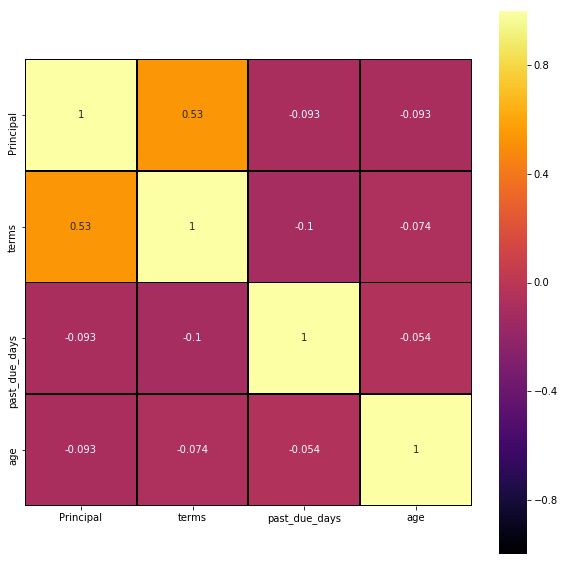

In [9]:
#  Finding out correlations between the features

fig=plt.gcf()
fig.set_size_inches(10,10)
fig=sns.heatmap(df.corr(),annot=True,cmap='inferno',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

### Data Visualization

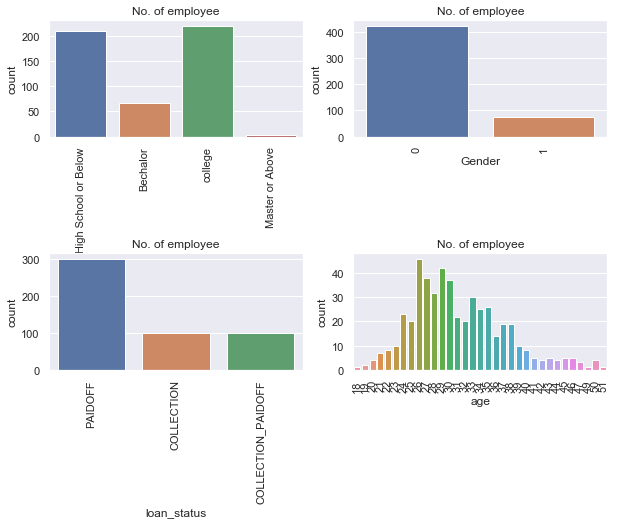

In [57]:
features=['education', 'Gender','loan_status','age']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

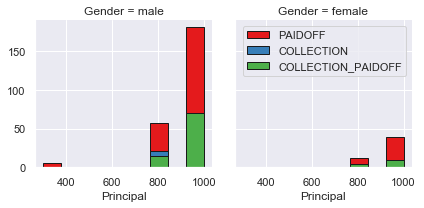

In [39]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

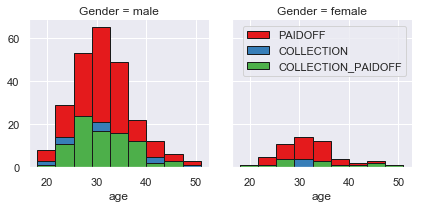

In [43]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

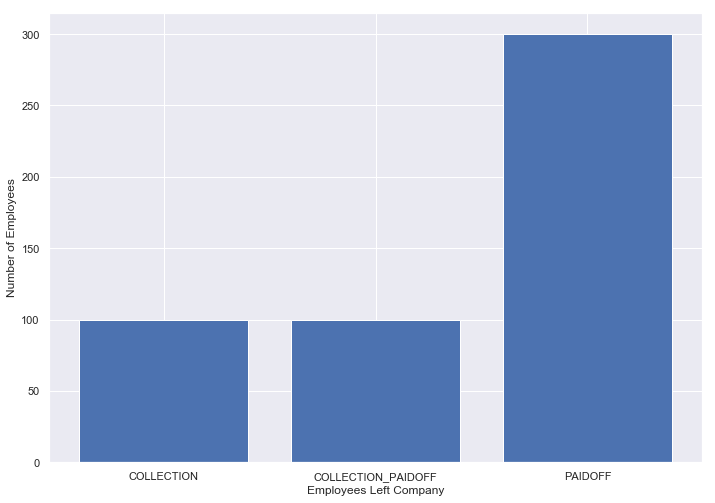

In [17]:
left_count=df.groupby('loan_status').count()
plt.bar(left_count.index.values, left_count['Principal'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

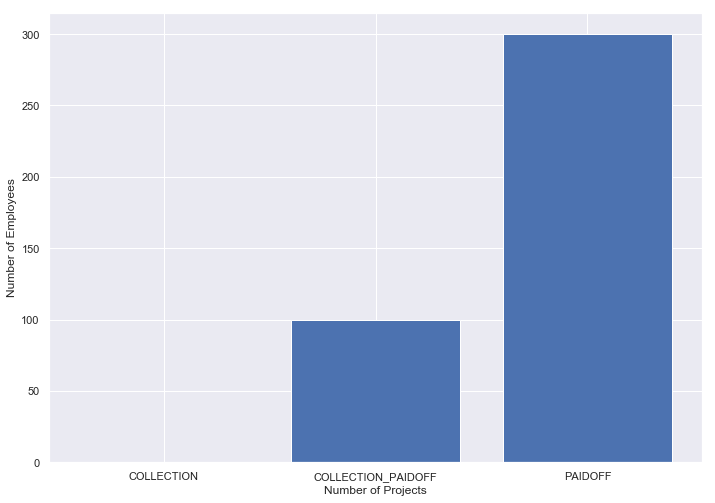

In [18]:
num_projects=df.groupby('loan_status').count()
plt.bar(num_projects.index.values, num_projects['paid_off_time'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

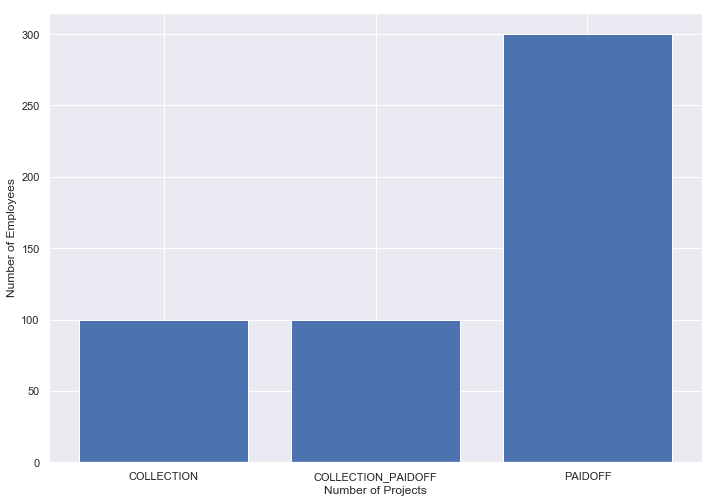

In [21]:
num_projects=df.groupby('loan_status').count()
plt.bar(num_projects.index.values, num_projects['age'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

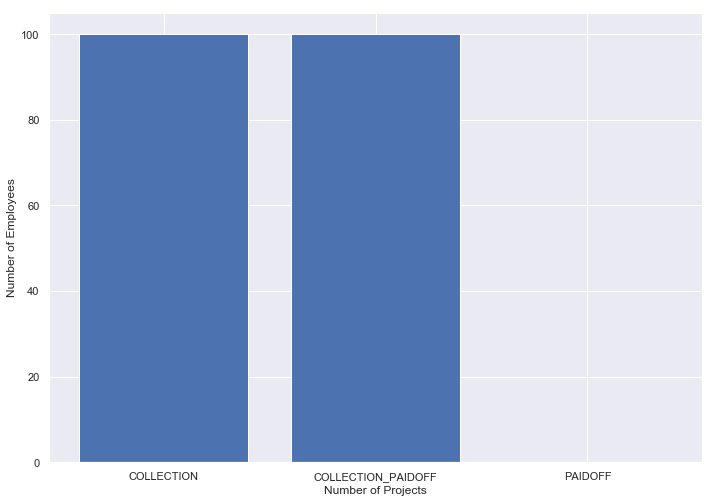

In [22]:
num_projects=df.groupby('loan_status').count()
plt.bar(num_projects.index.values, num_projects['past_due_days'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

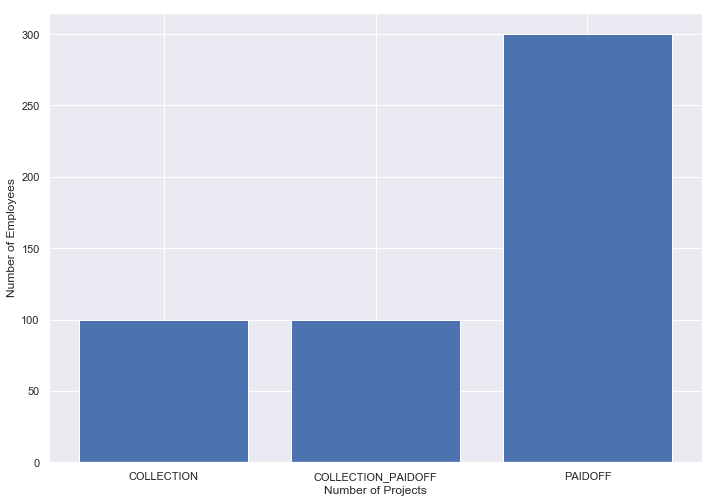

In [23]:
num_projects=df.groupby('loan_status').count()
plt.bar(num_projects.index.values, num_projects['education'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()